<img style="margin-left:auto" src="image.jpg" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', None)


In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
os.getcwd()


'c:\\Users\\Ahmed\\Desktop\\Brain_Stroke'

In [5]:
path = os.getcwd()


In [6]:
csv_path = os.path.join(path, "brain_stroke.csv")


In [7]:
brain_data = pd.read_csv(csv_path)


In [8]:
brain_data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
def shape_data(X, Y):
    print('Number Of columns is = {}'.format(X))
    print('Number Of columns is = {}'.format(Y))

shape_data(brain_data.shape[1], brain_data.shape[0])


Number Of columns is = 11
Number Of columns is = 4981


In [ ]:
def cols_name(self):
    cols_name = []
    for x in brain_data.columns:
        cols_name.append(x)
    print('Name of Columns is')
    return cols_name


cols_name(brain_data.columns)


Name of Columns is


['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [ ]:
brain_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
brain_data.stroke.value_counts()


0    4733
1     248
Name: stroke, dtype: int64

In [ ]:
brain_data.isna().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
brain_data.isna().any().any()


False

In [ ]:
brain_data.duplicated().any()


False

In [ ]:
brain_data.duplicated().sum()


0

In [ ]:
data_numerical = brain_data.select_dtypes(exclude='object')
data_numerical.describe().T.round(5)


,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.41986,22.66276,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.09617,0.29485,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.05521,0.22841,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.94356,45.07537,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.49817,6.79046,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.04979,0.21753,0.00,0.00,0.00,0.00,1.00


In [ ]:
a=brain_data['heart_disease'].value_counts()
b=brain_data['stroke'].value_counts()
c=brain_data['hypertension'].value_counts()

f=pd.DataFrame([a,b,c])
f.T

,heart_disease,stroke,hypertension
0,4706,4733,4502
1,275,248,479


<h4> Data Visualization</h4>

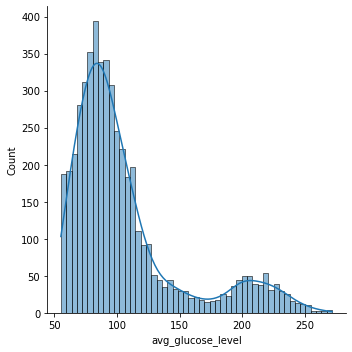

In [25]:
sns.displot(brain_data.avg_glucose_level,kde=True)
plt.title()
plt.xlabel()
plt.ylabel()
plt.show()

In [ ]:
sns.displot(brain_data.bmi,kde=True)
plt.title()
plt.xlabel()
plt.ylabel()
plt.show()

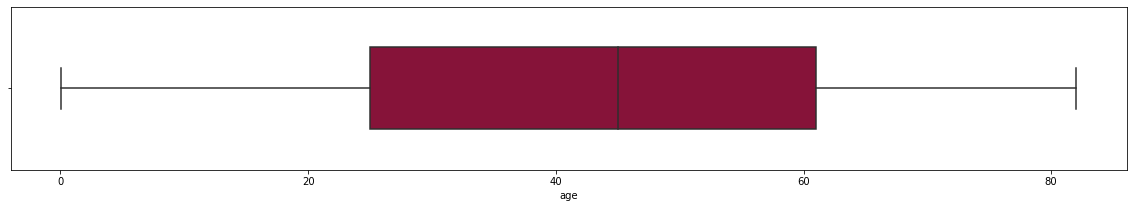

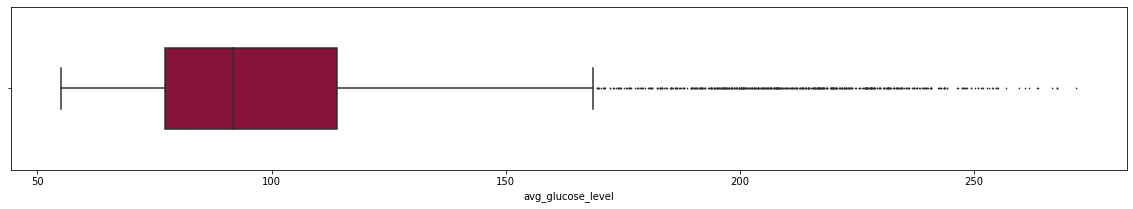

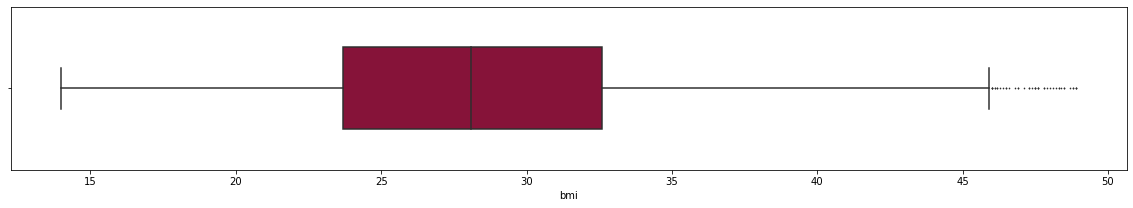

In [ ]:
def box_plots(col):
    for i in col:
        plt.figure(figsize=(20, 3))
        sns.boxplot(x=brain_data[i],
                    data=brain_data,
                    color='#990033', 
                    width=0.5,
                    fliersize=0.8)
        plt.show()

box_plots(data_numerical.drop(
    ['heart_disease', 'stroke', 'hypertension'], axis=1))

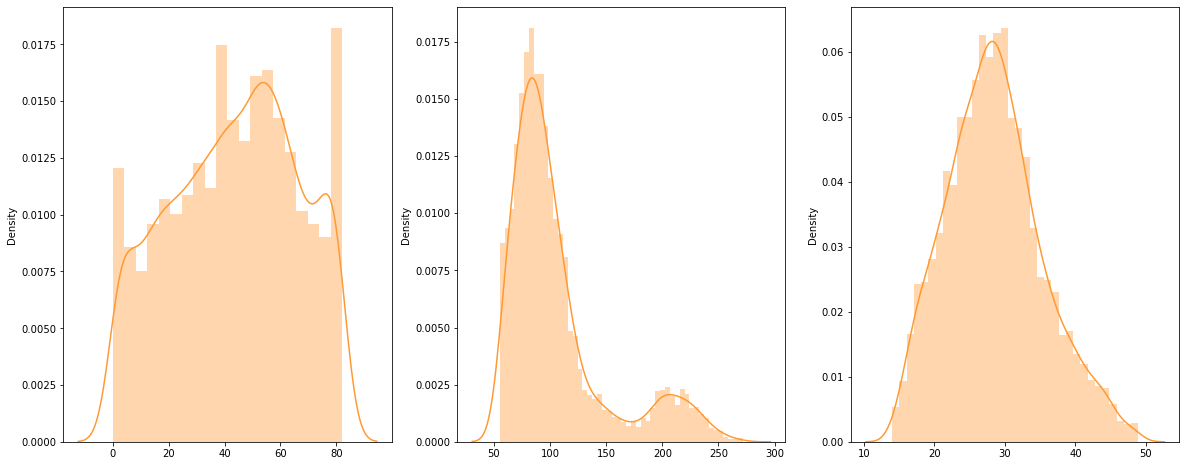

In [ ]:
def dist_plots(col):

    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 8))
    index = 0
    ax = ax.flatten()

    for i in col:
      sns.distplot(x=brain_data[i],
                  ax=ax[index],
                  color='#FF9933',
                  kde=True)
      
      index += 1 
dist_plots(data_numerical.drop(
    ['heart_disease', 'stroke', 'hypertension'], axis=1))

<h3>Outlier Detection and Removal Using IQR</h3>

Outlier for avg_glucose_level Column

In [ ]:
Q1_glucose = brain_data['avg_glucose_level'].quantile(0.25)
Q3_glucose = brain_data['avg_glucose_level'].quantile(0.75)
Q1_glucose, Q3_glucose


(77.23, 113.86)

In [ ]:
IQR_glucose = Q3_glucose - Q1_glucose
IQR_glucose


36.629999999999995

In [ ]:
low_limit = Q1_glucose - 1.5*IQR_glucose
high_limit = Q3_glucose + 1.5*IQR_glucose
low_limit, high_limit


(22.28500000000001, 168.805)

Outlier for Bmi Column

In [ ]:
Q1_bmi = brain_data['bmi'].quantile(0.25)
Q3_bmi = brain_data['bmi'].quantile(0.75)
Q1_bmi, Q3_bmi


(23.7, 32.6)

In [ ]:
IQR_bmi = Q3_bmi - Q1_bmi
IQR_bmi


8.900000000000002

In [ ]:
low_limit_bmi = Q1_bmi - 1.5*IQR_bmi
high_limit_bmi = Q3_bmi + 1.5*IQR_bmi
low_limit_bmi, high_limit_bmi


(10.349999999999996, 45.95)

<h4>Here are the outliers</h4>

In [ ]:
outlier_1 = brain_data[(brain_data.avg_glucose_level < low_limit) | (
    brain_data.avg_glucose_level > high_limit)]
outlier_1.shape


(602, 11)

In [ ]:
outlier_2 = brain_data[(brain_data.bmi < low_limit_bmi)
                       | (brain_data.bmi > high_limit_bmi)]
outlier_2.shape


(43, 11)

In [ ]:
out_1 = brain_data[(brain_data.avg_glucose_level > low_limit)
                   & (brain_data.avg_glucose_level < high_limit)]
out_2 = brain_data[(brain_data.bmi > low_limit_bmi) &
                   (brain_data.bmi < high_limit_bmi)]


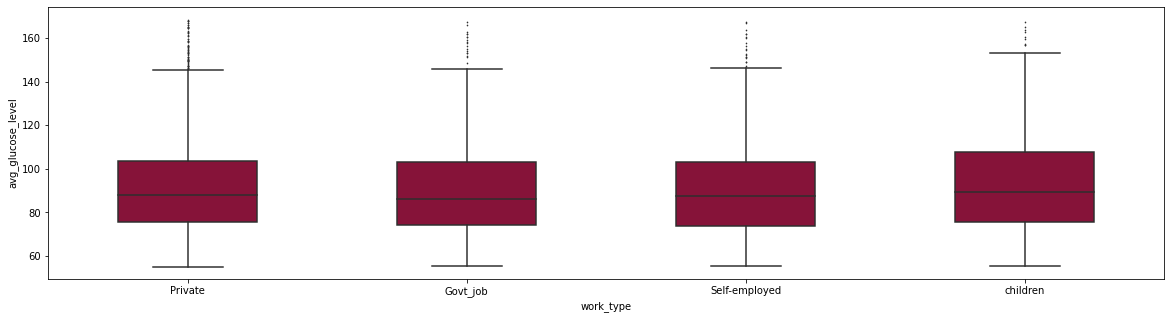

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=out_1.work_type, y=out_1.avg_glucose_level,
            color='#990033', width=0.5, fliersize=0.8)
plt.show()


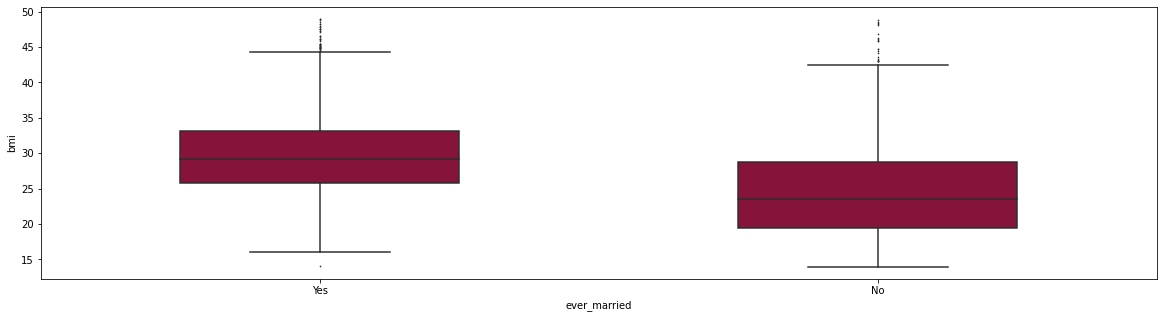

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=out_1.ever_married, y=out_1.bmi,
            color='#990033', width=0.5, fliersize=0.8)
plt.show()


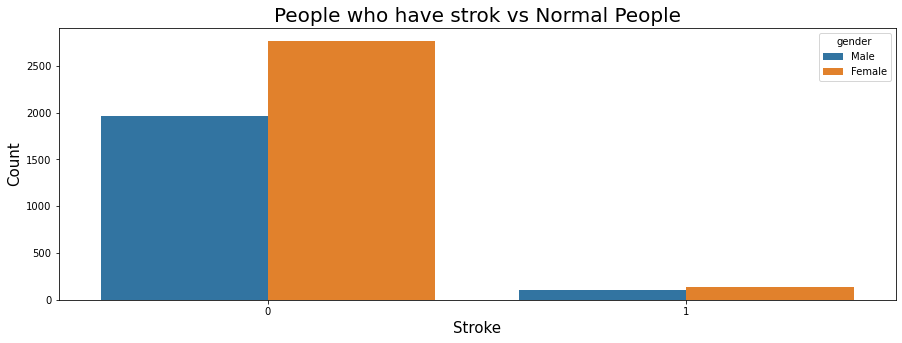

In [27]:
plt.figure(figsize=(15, 5))
sns.countplot(x='stroke', data=brain_data, hue='gender')
plt.title('People who have strok vs Normal People', fontsize=20)
plt.xlabel('Stroke',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()



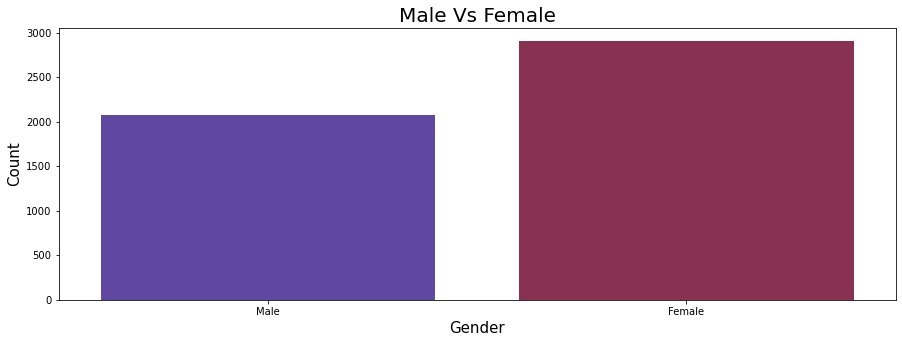

In [29]:
plt.figure(figsize=(15, 5))
sns.countplot(x='gender', data=brain_data,
              palette='twilight', saturation=0.9, dodge=True)
plt.title('Male Vs Female',fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


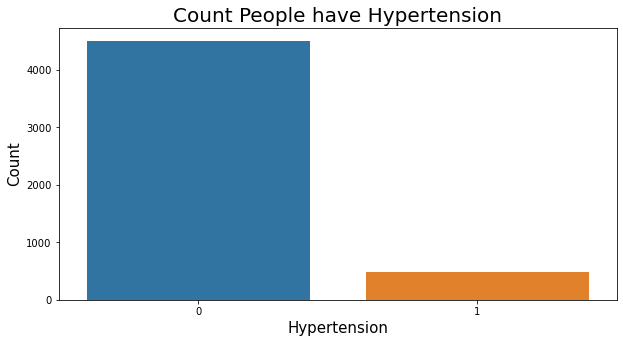

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='hypertension', data=brain_data)
plt.title('Count People have Hypertension',fontsize=20)
plt.xlabel('Hypertension',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


In [ ]:
brain_data.hypertension.corr(brain_data.stroke)


0.13196524198200155

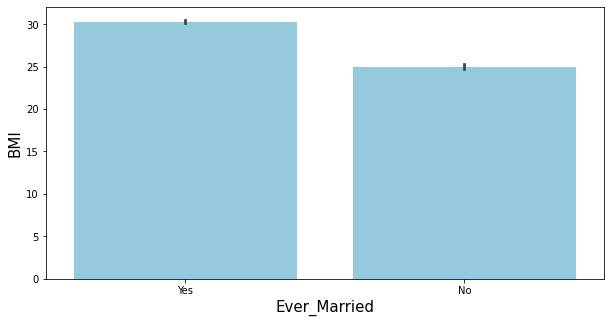

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='ever_married',
            y='bmi',
            data=brain_data,
            color='skyblue'
            )
plt.title('')
plt.xlabel('Ever_Married', fontsize=15)
plt.ylabel('BMI', fontsize=15)
plt.show()


(0.0, 60.0)

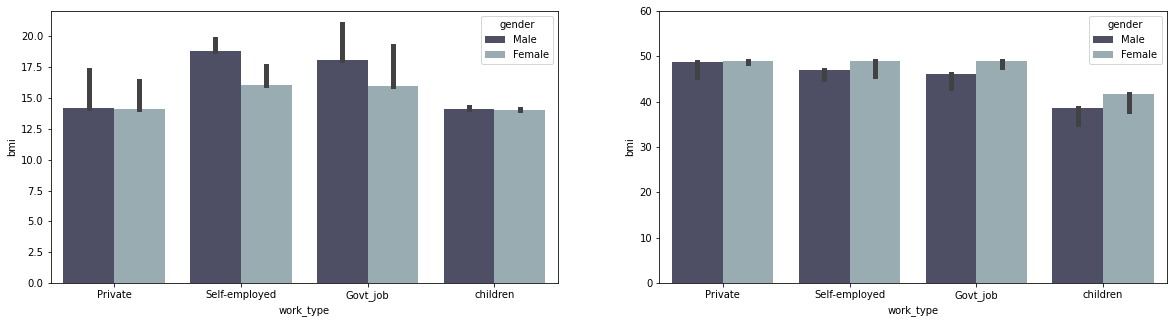

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='work_type',
            y='bmi',
            data=brain_data,
            palette='bone',
            estimator=np.min,
            hue='gender',
            errwidth=5
            )

plt.subplot(1, 2, 2)
sns.barplot(x='work_type',
            y='bmi',
            data=brain_data,
            palette='bone',
            estimator=np.max,
            hue='gender',
            errwidth=5,
            )

plt.ylim(0, 60)


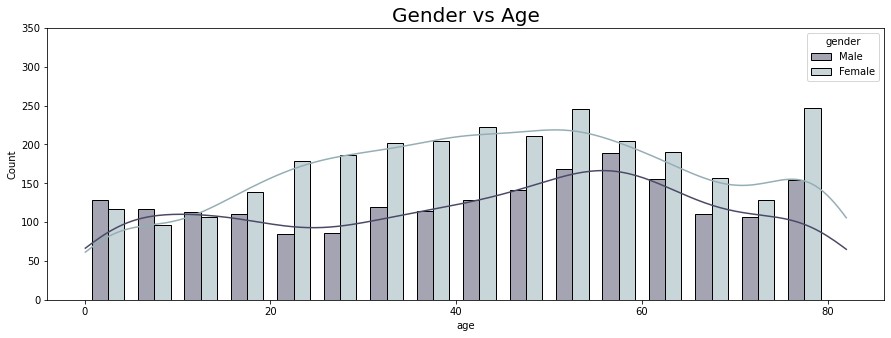

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(x='age', data=brain_data,
             binrange=(0, 80),
             binwidth=5,
             stat='count',
             hue='gender',
             multiple='dodge',
             shrink=0.7,
             palette='bone',
             kde=True
             )
plt.title('Gender vs Age', fontsize=20)
plt.ylim(0, 350)
plt.show()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score


In [ ]:
data_categrical = brain_data.select_dtypes(include='object')


In [ ]:
data_categrical.head()


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Male,Yes,Private,Rural,never smoked
2,Female,Yes,Private,Urban,smokes
3,Female,Yes,Self-employed,Rural,never smoked
4,Male,Yes,Private,Urban,formerly smoked


In [ ]:
la = LabelEncoder()
brain_data['gender'] = la.fit_transform(brain_data['gender'])
brain_data['work_type'] = la.fit_transform(brain_data['work_type'])
brain_data['ever_married'] = la.fit_transform(brain_data['ever_married'])
brain_data['Residence_type'] = la.fit_transform(brain_data['Residence_type'])
brain_data['smoking_status'] = la.fit_transform(brain_data['smoking_status'])


In [ ]:
x = brain_data.iloc[:, :-1].values
y = brain_data.iloc[:, -1].values


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=123)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

vr = VarianceThreshold(0)
vr.fit(x_train)


VarianceThreshold(threshold=0)

In [ ]:
vr.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Logistic Regression Model Result.
---------------------------------
All Scores of Model 0    0.9499
1    0.9499
2    0.9499
3    0.9499
4    0.9523
5    0.9523
6    0.9497
7    0.9472
8    0.9497
9    0.9497
dtype: float64
---------------------------------
Score of Traning is 0.95 %
---------------------------------
Score of Testing is 0.951 %
---------------------------------
Model Accuracy Score : 95.085 %
---------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       948
           1       0.50      0.02      0.04        49

    accuracy                           0.95       997
   macro avg       0.73      0.51      0.51       997
weighted avg       0.93      0.95      0.93       997



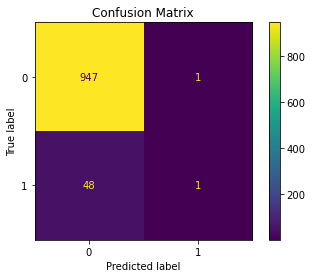

In [ ]:
def model_1(x_train, y_train):
    log = LogisticRegression()
    log.fit(x_train, y_train)
    print('Logistic Regression Model Result.')
    print("\033[1m---------------------------------\033[0m")

    scores = cross_val_score(log, x_train, y_train, cv=10, scoring='accuracy')
    print('All Scores of Model', pd.Series(scores.round(4)))
    print("\033[1m---------------------------------\033[0m")
    print('Score of Traning is {} %'.format(
        log.score(x_train, y_train).round(3)))
    print("\033[1m---------------------------------\033[0m")

    print('Score of Testing is {} %'.format(
        log.score(x_test, y_test).round(3)))

    y_pred = log.predict(x_test)
    accuracy = round(accuracy_score(y_pred, y_test) * 100, 3)
    print("\033[1m---------------------------------\033[0m")
    print("Model Accuracy Score :", accuracy, "%")

    plot_confusion_matrix(log, x_test, y_test)
    plt.title('Confusion Matrix')
    print("\033[1m---------------------------------\033[0m")
    print(classification_report(y_test, y_pred))


model_1(x_train, y_train)


Decision Tree Model Result.
All Scores of Model 0    0.9449
1    0.9348
2    0.9373
3    0.9348
4    0.9347
5    0.9271
6    0.9372
7    0.9070
8    0.9121
9    0.9196
dtype: float64
---------------------------------
Score of Traning is 0.969
---------------------------------
Score of Testing is 0.934
---------------------------------
Model Accuracy Score : 93.38 %
---------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       948
           1       0.16      0.08      0.11        49

    accuracy                           0.93       997
   macro avg       0.56      0.53      0.54       997
weighted avg       0.91      0.93      0.92       997



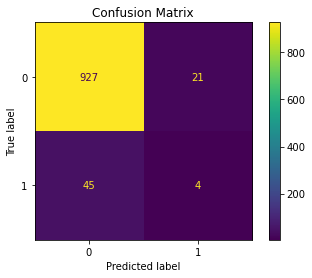

In [ ]:
def model_2(x_train, y_train):
    dec = DecisionTreeClassifier(max_depth=10, random_state=0)
    dec.fit(x_train, y_train)
    print('Decision Tree Model Result.')
    scores = cross_val_score(dec, x_train, y_train, cv=10, scoring='accuracy')
    print('All Scores of Model', pd.Series(scores.round(4)))

    print("\033[1m---------------------------------\033[0m")
    print('Score of Traning is {}'.format(
        dec.score(x_train, y_train).round(3)))
    print("\033[1m---------------------------------\033[0m")

    print('Score of Testing is {}'.format(dec.score(x_test, y_test).round(3)))

    y_pred = dec.predict(x_test)
    accuracy = round(accuracy_score(y_pred, y_test) * 100, 3)
    print("\033[1m---------------------------------\033[0m")
    print("Model Accuracy Score :", accuracy, "%")

    plot_confusion_matrix(dec, x_test, y_test)
    plt.title('Confusion Matrix')
    print("\033[1m---------------------------------\033[0m")
    print(classification_report(y_test, y_pred))


model_2(x_train, y_train)
